<a href="https://colab.research.google.com/github/Fairly-fire/Python-and-Machine-Learning/blob/main/Coffee_shop_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Analysis of Coffee Shop Menu


In [ ]:
pip install bioinfokit

     |████████████████████████████████| 84 kB 1.5 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.6-py3-none-any.whl size=57066 sha256=d38df8ff38074ae1da24b83f3317d96bc27c8b3b1104aca6a31b3760c88bf2a9
  Stored in directory: /root/.cache/pip/wheels/38/b2/a0/3f65c463d3faababa8cb5f3076e3bfc1c49fea2a736a49038a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7094 sha256=07ec54789f835e0aaa32f87bd00e899360773ba69dea7cfe76f9aa3fee08950c
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from bioinfokit.analys import stat

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Project_1__CoffeeShopMenu.csv to Project_1__CoffeeShopMenu.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['Project_1__CoffeeShopMenu.csv']))

**Import** and Study Dataset

In [ ]:
df

,Category,Beverage,Size,Milk,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
0,Coffee,Brewed Coffee,Short,None,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Coffee,Brewed Coffee,Tall,None,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Coffee,Brewed Coffee,Grande,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
3,Coffee,Brewed Coffee,Venti,None,5,0.1,0.0,0.0,0,10,0,0,0,1.0
4,Classic Espresso Drinks,Caffe Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Whole Milk,260,4.0,2.0,0.1,10,190,53,0,52,4.0
234,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Grande,Soymilk,240,2.0,0.2,0.0,0,180,51,1,49,3.0
235,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Nonfat Milk,310,0.2,0.1,0.0,5,260,70,0,69,6.0
236,Frappuccino Blended Creme,Strawberries & Creme (Without Whipped Cream),Venti,Whole Milk,350,6.0,3.0,0.2,15,260,70,0,68,6.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      238 non-null    object 
 1   Beverage      238 non-null    object 
 2   Size          238 non-null    object 
 3   Milk          238 non-null    object 
 4   Calories      238 non-null    int64  
 5   TotalFat      238 non-null    float64
 6   TransFat      238 non-null    float64
 7   SaturatedFat  238 non-null    float64
 8   Sodium        238 non-null    int64  
 9   TotalCarb     238 non-null    int64  
 10  Cholesterol   238 non-null    int64  
 11  DietaryFibre  238 non-null    int64  
 12  Sugars        238 non-null    int64  
 13  Protein       238 non-null    float64
dtypes: float64(4), int64(6), object(4)
memory usage: 26.2+ KB


Exploratory Data Analysis

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,238.0,193.810924,103.668135,0.0,120.0,185.0,260.00,510.0
TotalFat,238.0,2.931933,2.956133,0.0,0.2,2.5,4.50,15.0
TransFat,238.0,1.318908,1.648097,0.0,0.1,0.5,2.00,9.0
SaturatedFat,238.0,0.037815,0.071737,0.0,0.0,0.0,0.10,0.3
Sodium,238.0,6.407563,8.679348,0.0,0.0,5.0,10.00,40.0
TotalCarb,238.0,128.067227,82.656396,0.0,70.0,120.0,170.00,340.0
Cholesterol,238.0,35.878151,20.927388,0.0,21.0,34.0,50.75,90.0
DietaryFibre,238.0,0.815126,1.455189,0.0,0.0,0.0,1.00,8.0
Sugars,238.0,32.819328,19.838082,0.0,18.0,32.0,43.75,84.0
Protein,238.0,7.032773,4.893173,0.0,3.0,6.0,10.00,20.0


In [ ]:
df.columns

Index(['Category', 'Beverage', 'Size', 'Milk', 'Calories', 'TotalFat',
       'TransFat', 'SaturatedFat', 'Sodium', 'TotalCarb', 'Cholesterol',
       'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [ ]:
df.value_counts(df.Beverage)

NameError: ignored

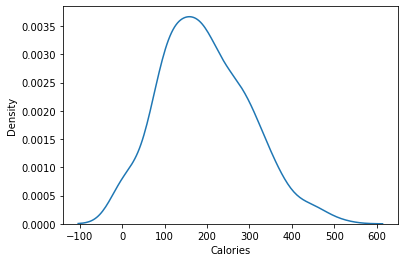

In [ ]:
sns.kdeplot(df.Calories)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


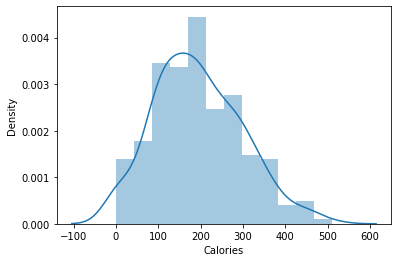

In [ ]:
sns.distplot(df.Calories)

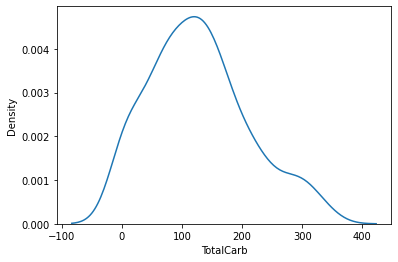

In [ ]:
sns.kdeplot(df.TotalCarb)

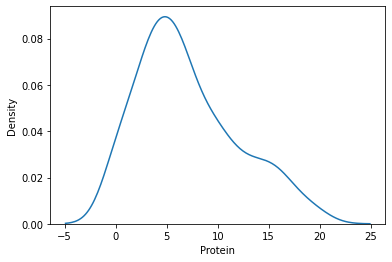

In [ ]:
sns.kdeplot(df.Protein)

Text(0, 0.5, 'Sugars')

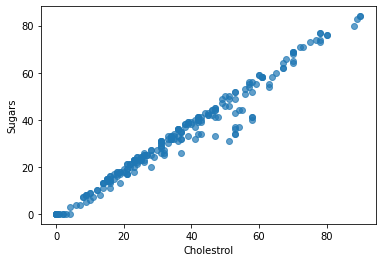

In [ ]:
plt.scatter(df.Cholesterol,df.Sugars,alpha=0.7)
plt.xlabel('Cholestrol')
plt.ylabel('Sugars')

In [ ]:
objcol = df.dtypes[df.dtypes=='object'].index
numcol = df.dtypes[df.dtypes!='object'].index

In [ ]:
numcol

Index(['Calories', 'TotalFat', 'TransFat', 'SaturatedFat', 'Sodium',
       'TotalCarb', 'Cholesterol', 'DietaryFibre', 'Sugars', 'Protein'],
      dtype='object')

In [ ]:
len(numcol)

10

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

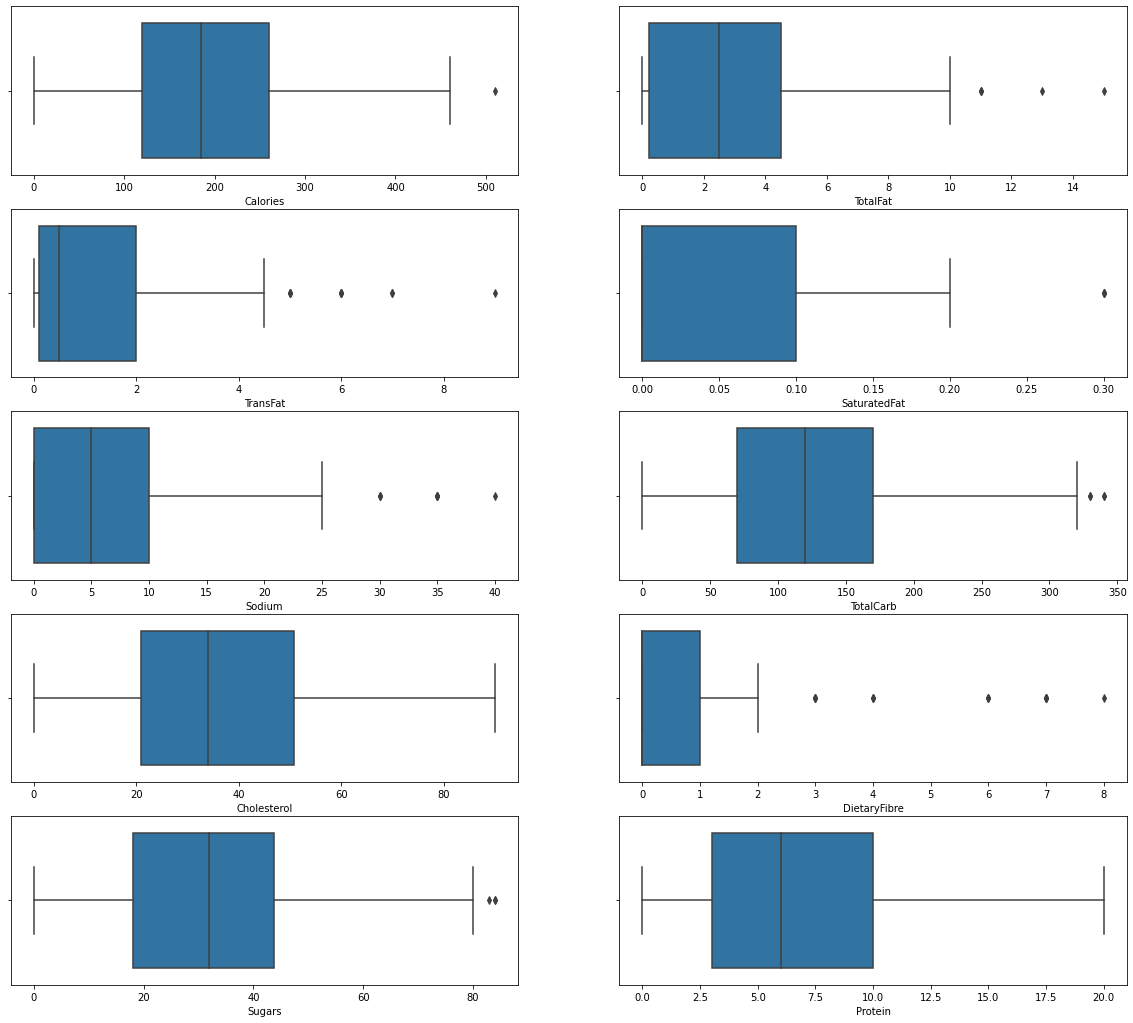

In [ ]:
plt.figure(figsize=(20,18))
count =1
for i in numcol:
  plt.subplot(5,2,count)
  sns.boxplot(df.loc[:,i])
  count = count +1

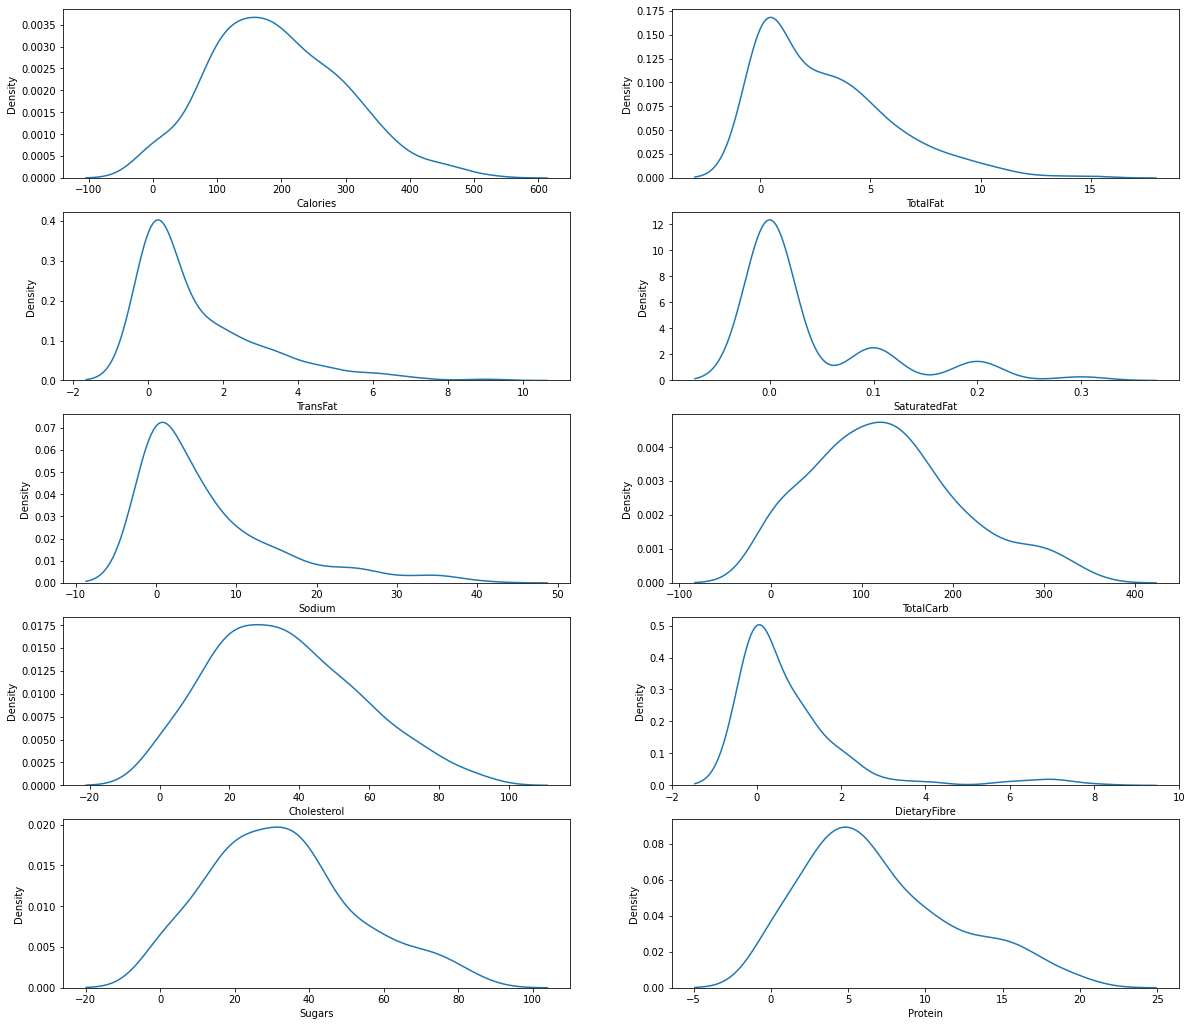

In [ ]:
plt.figure(figsize=(20,18))
count =1
for i in numcol:
  plt.subplot(5,2,count)
  sns.kdeplot(df.loc[:,i])
  count = count +1

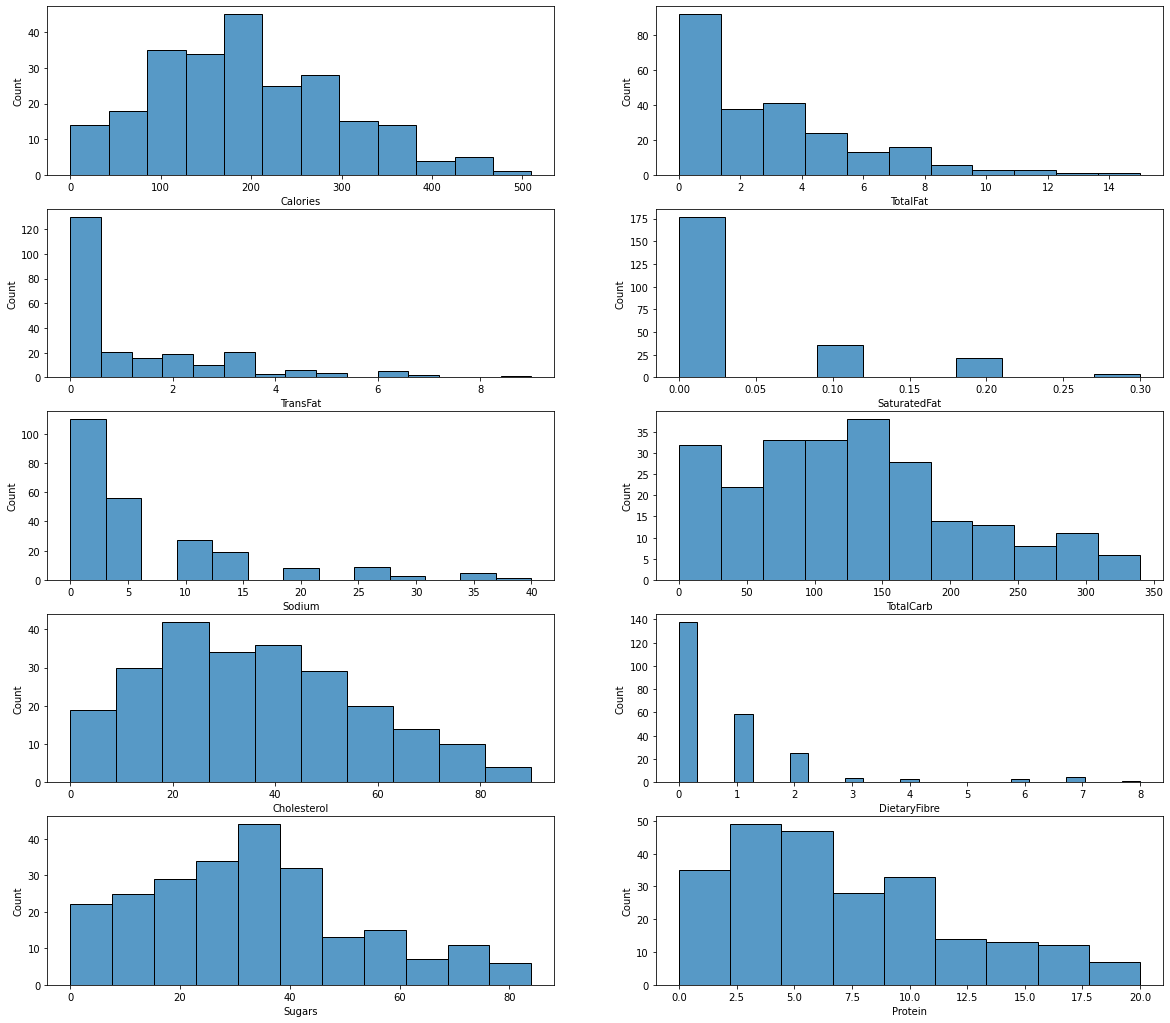

In [ ]:
plt.figure(figsize=(20,18))
count =1
for i in numcol:
  plt.subplot(5,2,count)
  sns.histplot(df.loc[:,i])
  count = count +1

In [ ]:
objcol

Index(['Category', 'Beverage', 'Size', 'Milk'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


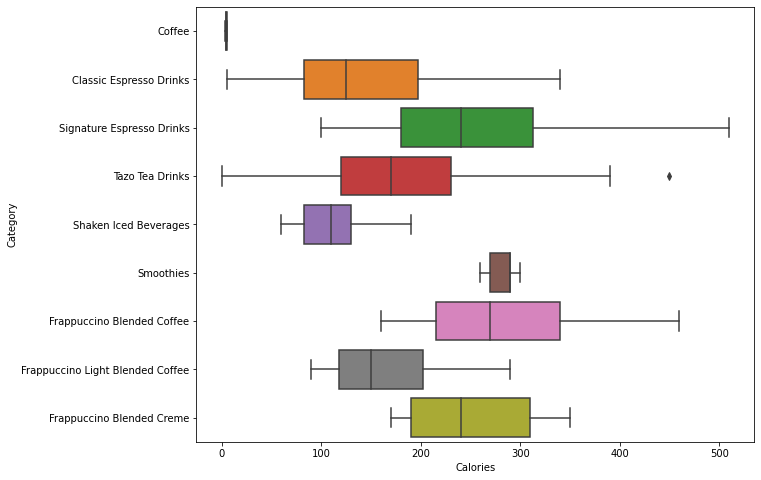

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df.Calories, df.Category)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


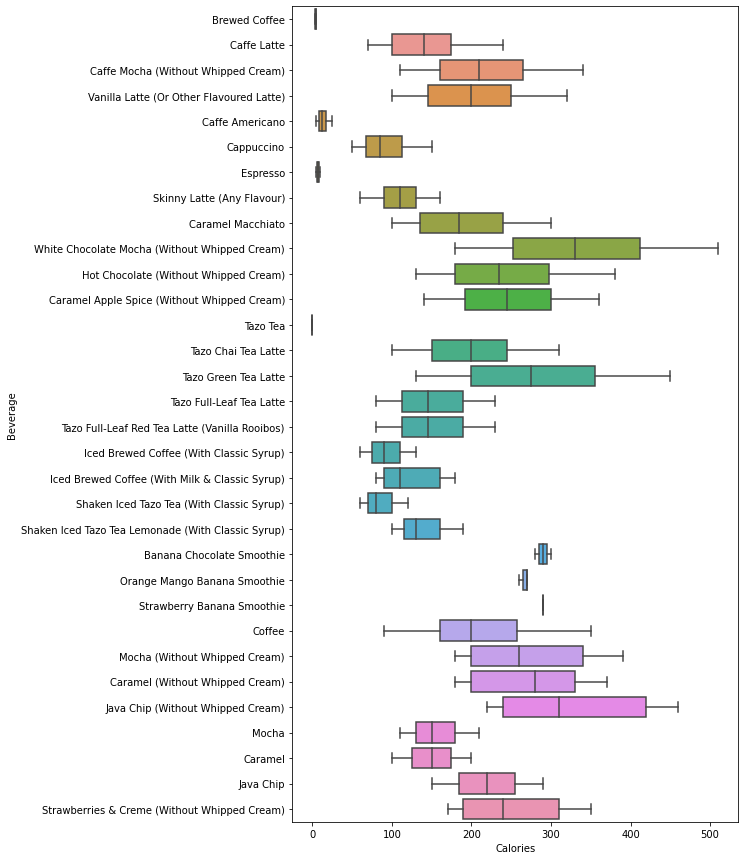

In [ ]:
plt.figure(figsize= (8,15))
sns.boxplot(df.Calories, df.Beverage)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


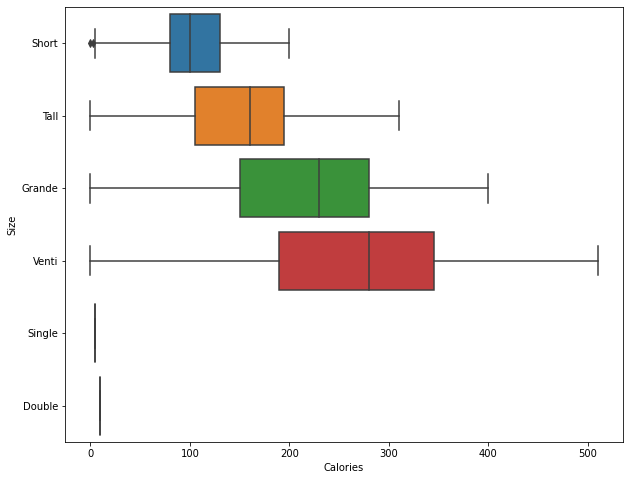

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df.Calories, df.Size)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


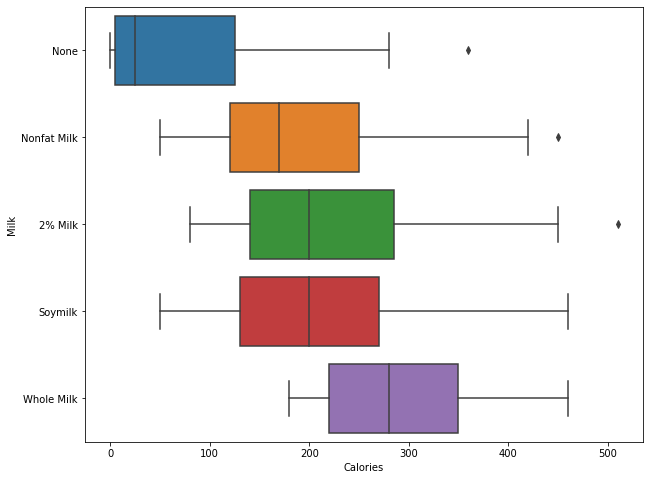

In [ ]:
plt.figure(figsize=(10,8))
sns.boxplot(df.Calories, df.Milk)

In [ ]:
df.corr()

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Calories,1.000000,0.636476,0.645691,0.332305,0.388229,0.796933,0.940820,0.386000,0.911007,0.581001
TotalFat,0.636476,1.000000,0.889677,0.618044,0.585912,0.460300,0.379539,0.257285,0.338384,0.549996
TransFat,0.645691,0.889677,1.000000,0.693413,0.706656,0.533636,0.445614,0.129895,0.426742,0.496012
SaturatedFat,0.332305,0.618044,0.693413,1.000000,0.920493,0.242933,0.164689,-0.094424,0.182713,0.288548
Sodium,0.388229,0.585912,0.706656,0.920493,1.000000,0.294795,0.201423,-0.061158,0.208555,0.496262
TotalCarb,0.796933,0.460300,0.533636,0.242933,0.294795,1.000000,0.765836,0.178905,0.770051,0.419695
Cholesterol,0.940820,0.379539,0.445614,0.164689,0.201423,0.765836,1.000000,0.346333,0.984227,0.365335
DietaryFibre,0.386000,0.257285,0.129895,-0.094424,-0.061158,0.178905,0.346333,1.000000,0.188848,0.539622
Sugars,0.911007,0.338384,0.426742,0.182713,0.208555,0.770051,0.984227,0.188848,1.000000,0.268728
Protein,0.581001,0.549996,0.496012,0.288548,0.496262,0.419695,0.365335,0.539622,0.268728,1.000000


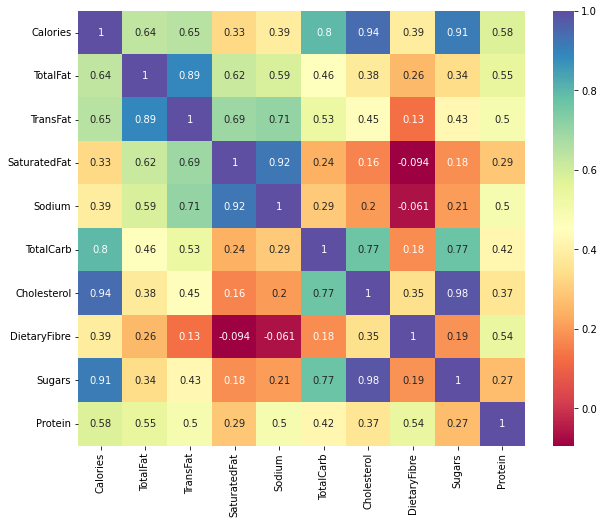

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='Spectral')

In [ ]:
df.Category.value_counts()

Classic Espresso Drinks             58
Tazo Tea Drinks                     52
Signature Espresso Drinks           40
Frappuccino Blended Coffee          36
Shaken Iced Beverages               18
Frappuccino Light Blended Coffee    12
Smoothies                            9
Frappuccino Blended Creme            9
Coffee                               4
Name: Category, dtype: int64

In [ ]:
df.Beverage.value_counts()

Cappuccino                                            12
Tazo Chai Tea Latte                                   12
Vanilla Latte (Or Other Flavoured Latte)              12
White Chocolate Mocha (Without Whipped Cream)         12
Coffee                                                12
Hot Chocolate (Without Whipped Cream)                 12
Caffe Mocha (Without Whipped Cream)                   12
Tazo Green Tea Latte                                  12
Caramel Macchiato                                     12
Tazo Full-Leaf Tea Latte                              12
Tazo Full-Leaf Red Tea Latte (Vanilla Rooibos)        12
Caffe Latte                                           12
Mocha (Without Whipped Cream)                          9
Caramel (Without Whipped Cream)                        9
Strawberries & Creme (Without Whipped Cream)           9
Iced Brewed Coffee (With Milk & Classic Syrup)         9
Java Chip (Without Whipped Cream)                      9
Caffe Americano                

In [ ]:
df.Size.value_counts()

Grande    72
Venti     63
Tall      63
Short     38
Single     1
Double     1
Name: Size, dtype: int64

In [ ]:
df.Milk.value_counts()

Nonfat Milk    81
Soymilk        65
2% Milk        50
None           27
Whole Milk     15
Name: Milk, dtype: int64

In [ ]:
df.groupby('Category').mean().sort_values('TotalFat', ascending = False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [ ]:
df.groupby('Category').mean().sort_values('Calories', ascending = False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [ ]:
df.groupby('Category').mean().sort_values('Protein', ascending = False)

,Calories,TotalFat,TransFat,SaturatedFat,Sodium,TotalCarb,Cholesterol,DietaryFibre,Sugars,Protein
Category,,,,,,,,,,
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207
Tazo Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692
Frappuccino Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000
Frappuccino Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222
Frappuccino Blended Creme,248.888889,2.244444,0.844444,0.044444,4.444444,193.888889,53.111111,0.333333,51.555556,4.111111
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000


In [ ]:
pd.pivot_table(data=df, values='Calories', index='Category', columns='Milk',aggfunc='mean')

Milk,2% Milk,None,Nonfat Milk,Soymilk,Whole Milk
Category,,,,,
Classic Espresso Drinks,184.375000,11.666667,134.500000,151.250000,NaN
Coffee,NaN,4.250000,NaN,NaN,NaN
Frappuccino Blended Coffee,NaN,NaN,267.500000,268.333333,295.000000
Frappuccino Blended Creme,NaN,NaN,236.666667,243.333333,266.666667
Frappuccino Light Blended Coffee,NaN,NaN,162.500000,NaN,NaN
Shaken Iced Beverages,130.000000,106.666667,116.666667,120.000000,NaN
Signature Espresso Drinks,275.833333,247.500000,233.333333,241.666667,NaN
Smoothies,286.666667,NaN,276.666667,283.333333,NaN
Tazo Tea Drinks,211.875000,0.000000,175.625000,188.750000,NaN


ANOVA

In [ ]:
#Milk vs Calories
formula = 'Calories ~C(Milk)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Milk),4.0,5.584364e+05,139609.099632,16.357517,7.975236e-12
Residual,233.0,1.988622e+06,8534.858769,NaN,NaN


In [ ]:
df2 = df[df.Milk != 'None']
df2.shape

(211, 14)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


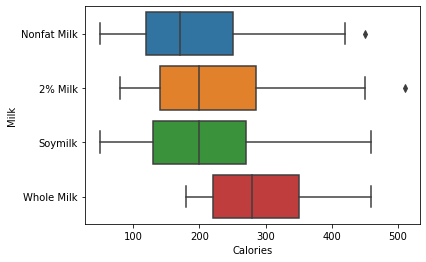

In [ ]:
sns.boxplot(df2.Calories, df2.Milk)

In [ ]:
formula = 'Calories ~C(Milk)'
model = ols(formula, df2).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(Milk),3.0,1.317432e+05,43914.396571,5.184292,0.001789
Residual,207.0,1.753427e+06,8470.663896,NaN,NaN


In [ ]:
res = stat()
res.tukey_hsd(df2, res_var='Calories', xfac_var= 'Milk', anova_model = 'Calories ~C(Milk)')
res.tukey_summary

,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Nonfat Milk,2% Milk,28.493827,-14.380041,71.367696,2.434439,0.315317
1,Nonfat Milk,Soymilk,18.186135,-21.511239,57.883509,1.678106,0.620007
2,Nonfat Milk,Whole Milk,99.827160,32.818334,166.835987,5.457045,0.001000
3,2% Milk,Soymilk,10.307692,-34.535010,55.150395,0.841997,0.900000
4,2% Milk,Whole Milk,71.333333,1.153783,141.512884,3.723255,0.044752
5,Soymilk,Whole Milk,81.641026,13.355726,149.926326,4.379475,0.011860


`#Looking at p-values , we can't say for sure which milk is the best and has least calories. But we can conclude that any milk is better than Whole Milk.`

***LINEAR REGRESSION***

In [ ]:
formula = 'Calories ~ Milk+ Category+ Beverage+ Size+ TotalFat+ TransFat+ SaturatedFat+ Sodium+ TotalCarb+ Cholesterol+ DietaryFibre+ Sugars+ Protein'
lm = smf.ols(formula=formula, data=df).fit()
print(lm.summary())
#This is ineffective cause Beverage names shouldn't be use as they maybe organised in different names and still might be same.

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2673.
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          3.27e-244
Time:                        10:37:54   Log-Likelihood:                -665.69
No. Observations:                 238   AIC:                             1429.
Df Residuals:                     189   BIC:                             1600.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                                                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------

In [ ]:
formula = 'Calories ~ Sugars+ TotalCarb + Cholesterol'                                             
lm = smf.ols(formula=formula, data=df).fit()
print(lm.summary())
#Here intercept is not stable as p-value is much greater than 0.05(Other models)

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     786.9
Date:                Sat, 02 Oct 2021   Prob (F-statistic):          6.57e-122
Time:                        11:06:41   Log-Likelihood:                -1155.5
No. Observations:                 238   AIC:                             2319.
Df Residuals:                     234   BIC:                             2333.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      19.4950      4.135      4.714      

In [ ]:
formula = 'Calories ~ TotalFat+ Sugars+ Protein'
lm = smf.ols(formula=formula, data=df).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     9152.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):          3.42e-242
Time:                        18:28:10   Log-Likelihood:                -873.77
No. Observations:                 238   AIC:                             1756.
Df Residuals:                     234   BIC:                             1769.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7872      1.365      1.309      0.1

In [ ]:
pred = lm.predict(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


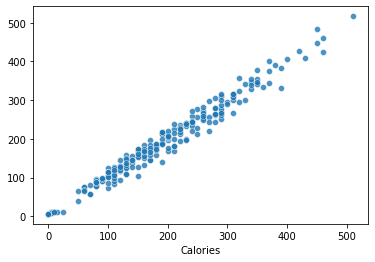

In [ ]:
#Correlation
sns.scatterplot(df.Calories, pred, alpha=0.8)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


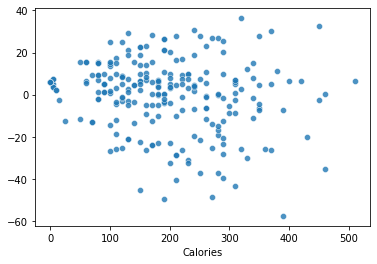

In [ ]:
#Residue- No pattern but mostly concentrated near 0 so good
sns.scatterplot(df.Calories, pred-df.Calories, alpha=0.8)

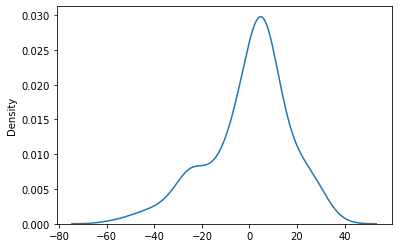

In [ ]:
sns.kdeplot(pred-df.Calories)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


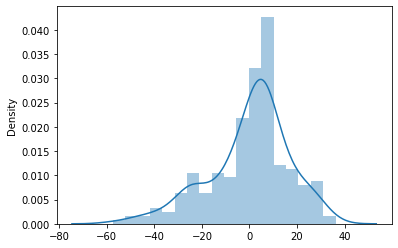

In [ ]:
sns.distplot(pred-df.Calories)

In [ ]:
#the end!